In [1]:
import xarray as xr

import pymc as pymc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import arviz as az
import pytensor.tensor as pt

from scipy.special import expit

from werp_projecting_sfis.file_io import sfi_file_to_pandas 

import random

import statsmodels.api as sm


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
filename = r"C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/_MURR_B0H000__eFA_annual_stats_10discount.txt"
outdf0 = sfi_file_to_pandas(filename)
outdf0['ewater'] = 0.0
outdf0['ewateri'] =  0
filename1 = r"C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/_MURR_P0H000__eFA_annual_stats_10discount.txt"
outdf1 = sfi_file_to_pandas(filename1)
outdf1['ewater'] = 2750.0
outdf1['ewateri'] = 1
outdf = pd.concat([outdf0,outdf1], axis=0)

outdf.set_index(['ewateri'], append=True, inplace=True)
#outdf = outdf1.copy(deep=True)

In [3]:
inflowfile = "C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/InflowData_from modelled outputs_P0H/MURR_P0H.csv"

inpredictor = pd.read_csv(inflowfile)
inpredictor['date'] = pd.to_datetime(inpredictor['date'])
inpredictor.set_index('date', inplace=True)
inpredictor
annualpredictor0 = inpredictor.resample("YE-JUN").sum()
annualpredictor0['ewater'] = 2750.0
annualpredictor0['ewateri'] = 1
inflowfile = "C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/InflowData_from modelled outputs_P0H/MURR_B0H.csv"

inpredictor = pd.read_csv(inflowfile)
inpredictor['date'] = pd.to_datetime(inpredictor['date'])
inpredictor.set_index('date', inplace=True)
inpredictor
annualpredictor1 = inpredictor.resample("YE-JUN").sum()
annualpredictor1['ewater'] =  0.0
annualpredictor1['ewateri'] =  0

annualpredictor = pd.concat([annualpredictor1, annualpredictor0], axis = 0)

#annualpredictor = annualpredictor0.copy(deep=True)


In [4]:
annualpredictor.set_index(['ewateri'], append=True, inplace=True)

In [5]:
outdf

,,BMF_R1,BMF_R2,BMF_R3,BMF_R4,BMF_R5,BMF_R6,BMF_R7,GKP_R1,GKP_R2,GKP_R3,...,EDW_R2,EDW_R3,EDW_R4,EDW_R5,LDF_R1,LDF_R2,LDF_R3,LDF_R4,LDF_R5,ewater
,ewateri,,,,,,,,,,,,,,,,,,,,,
1896-06-30,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1897-06-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1898-06-30,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1899-06-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-06-30,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-30,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0
2006-06-30,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0
2007-06-30,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0


In [6]:
laggedinflow_predictor = annualpredictor.copy(deep=True)
laggedinflow_predictor.columns = [col +"_lagged" for col in laggedinflow_predictor.columns]
laggedinflow_predictor.reset_index(inplace=True)
laggedtimeindex = laggedinflow_predictor['date']
laggedtimeindexstring = [ str(laggedtime.year-1) + "-" + str(laggedtime.month) + "-" + str(laggedtime.day) for laggedtime in laggedtimeindex]
laggedinflow_predictor['date'] = pd.to_datetime(laggedtimeindexstring)
laggedinflow_predictor.set_index(['date','ewateri'], append=False, inplace=True)
laggedinflow_predictor

,,inflow_lagged,outflow_lagged,local_lagged,ewater_lagged
date,ewateri,,,,
1895-06-30,0,7881104.0,2374620.0,5.594508e+06,0.0
1896-06-30,0,5613518.0,864139.0,4.225391e+06,0.0
1897-06-30,0,7688981.0,578393.0,4.986283e+06,0.0
1898-06-30,0,8066449.0,1135672.0,6.189946e+06,0.0
1899-06-30,0,7435997.0,1742445.0,5.112734e+06,0.0
...,...,...,...,...,...
2004-06-30,1,7253731.0,1711289.0,5.462452e+06,2750.0
2005-06-30,1,8887863.0,2754732.0,6.492137e+06,2750.0
2006-06-30,1,2910648.0,723644.0,2.152755e+06,2750.0


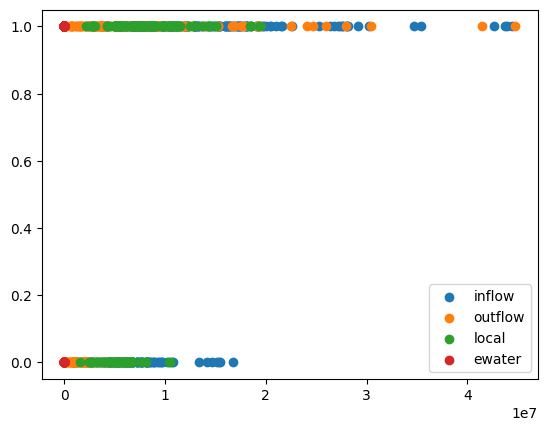

In [7]:
for col in annualpredictor.columns:
    plt.scatter(annualpredictor[col], outdf['BMF_R1'], label = col)

plt.legend()

In [8]:
BMFinds = [ i for i in outdf.columns if "BMF" in i]

In [9]:
data = pd.concat([annualpredictor['inflow'], annualpredictor['ewater']],axis=1, join='inner')
data = pd.concat([data,outdf[BMFinds]],axis=1)
data['inflow'] = (data['inflow']/1000000)
data['ewater'] = (data['ewater']/1000)
data = data.reset_index()[data.columns[0:]]
data

,inflow,ewater,BMF_R1,BMF_R2,BMF_R3,BMF_R4,BMF_R5,BMF_R6,BMF_R7
0,7.881104,0.00,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,5.613518,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.688981,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.066449,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.435997,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
223,7.253731,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0
224,8.887863,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0
225,2.910648,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0
226,4.761189,2.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([<Axes: xlabel='None,ewateri'>, <Axes: xlabel='None,ewateri'>,
       <Axes: xlabel='None,ewateri'>, <Axes: xlabel='None,ewateri'>,
       <Axes: xlabel='None,ewateri'>, <Axes: xlabel='None,ewateri'>,
       <Axes: xlabel='None,ewateri'>], dtype=object)

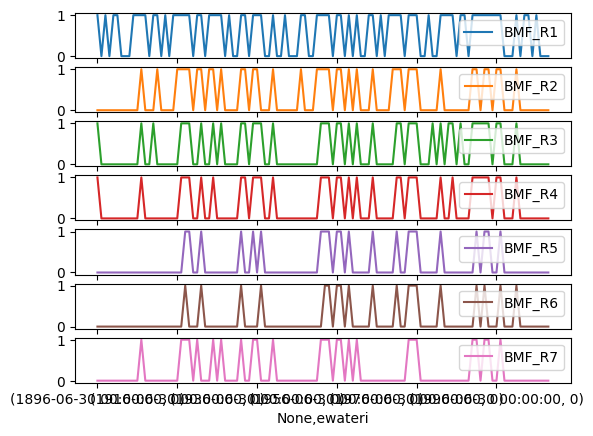

In [10]:
outdf[outdf['ewater']==0][BMFinds].plot.line(subplots=True)

7 0 BMF_R7 BMF_R1
7 1 BMF_R7 BMF_R2
7 2 BMF_R7 BMF_R3
7 3 BMF_R7 BMF_R4
7 4 BMF_R7 BMF_R5
7 5 BMF_R7 BMF_R6
7 6 BMF_R7 BMF_R7
8 1 BMF_R1 BMF_R2
8 2 BMF_R1 BMF_R3
8 3 BMF_R1 BMF_R4
8 4 BMF_R1 BMF_R5
8 5 BMF_R1 BMF_R6
8 6 BMF_R1 BMF_R7
9 2 BMF_R2 BMF_R3
9 3 BMF_R2 BMF_R4
9 4 BMF_R2 BMF_R5
9 5 BMF_R2 BMF_R6
9 6 BMF_R2 BMF_R7
10 3 BMF_R3 BMF_R4
10 4 BMF_R3 BMF_R5
10 5 BMF_R3 BMF_R6
10 6 BMF_R3 BMF_R7
11 4 BMF_R4 BMF_R5
11 5 BMF_R4 BMF_R6
11 6 BMF_R4 BMF_R7
12 5 BMF_R5 BMF_R6
12 6 BMF_R5 BMF_R7
13 6 BMF_R6 BMF_R7


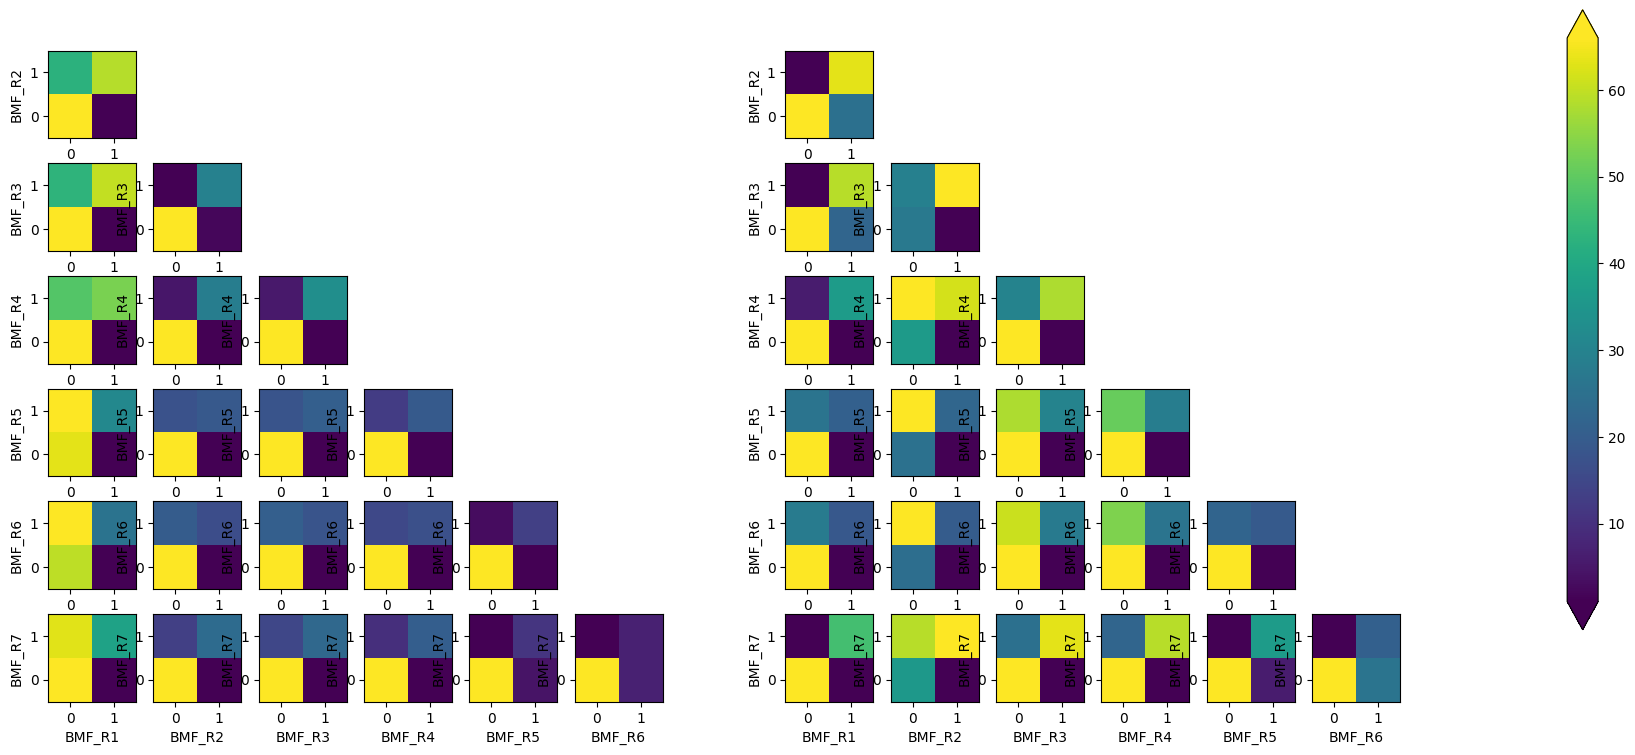

In [11]:
fig, ax = plt.subplots(7, 14, figsize=(20,10))
pltdata = outdf[outdf['ewater']==0]
for i in range(7):
    for j in range(i+1,7):
        #print(i,j)
        sc = ax[j,i].imshow(pd.crosstab(pltdata[BMFinds[i]],pltdata[BMFinds[j]]).values)
        ax[j,i].set_xlabel(BMFinds[i])
        ax[j,i].set_ylabel(BMFinds[j])
        ax[j,i].invert_yaxis()
    for j in range(i+1):
        fig.delaxes(ax[j,i]) 

pltdata = outdf[outdf['ewater']!=0]
for i in range(7,14):
    for j in range(i-7,7):
        print(i,j, BMFinds[i-8], BMFinds[j])
        sc = ax[j,i].imshow(pd.crosstab(pltdata[BMFinds[i-8]],pltdata[BMFinds[j]]).values)
        ax[j,i].set_xlabel(BMFinds[i-7])
        ax[j,i].set_ylabel(BMFinds[j])
        ax[j,i].invert_yaxis()
    for j in range(i+1-7):
        fig.delaxes(ax[j,i]) 

fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.04,  extend = 'both')

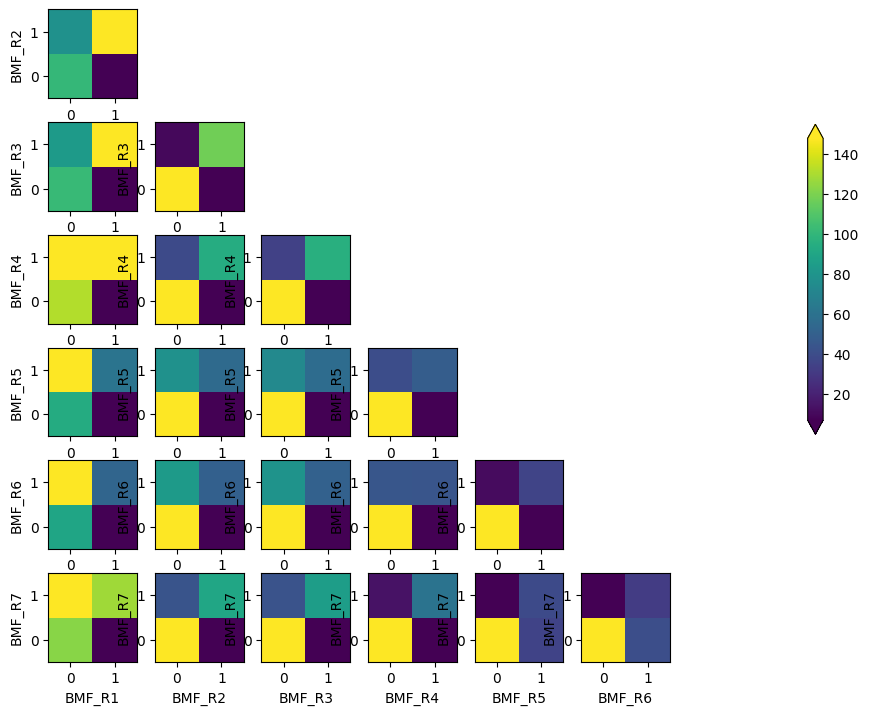

In [12]:
fig, ax = plt.subplots(7, 7, figsize=(10,10))
pltdata = outdf
for i in range(7):
    for j in range(i+1,7):
        #print(i,j)
        sc = ax[j,i].imshow(pd.crosstab(pltdata[BMFinds[i]],pltdata[BMFinds[j]]).values)
        ax[j,i].set_xlabel(BMFinds[i])
        ax[j,i].set_ylabel(BMFinds[j])
        ax[j,i].invert_yaxis()
    for j in range(i+1):
        fig.delaxes(ax[j,i])    

fig.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.04,  extend = 'both')

In [13]:
annualpredictor

,,inflow,outflow,local,ewater
date,ewateri,,,,
1896-06-30,0,7881104.0,2374620.0,5.594508e+06,0.0
1897-06-30,0,5613518.0,864139.0,4.225391e+06,0.0
1898-06-30,0,7688981.0,578393.0,4.986283e+06,0.0
1899-06-30,0,8066449.0,1135672.0,6.189946e+06,0.0
1900-06-30,0,7435997.0,1742445.0,5.112734e+06,0.0
...,...,...,...,...,...
2005-06-30,1,7253731.0,1711289.0,5.462452e+06,2750.0
2006-06-30,1,8887863.0,2754732.0,6.492137e+06,2750.0
2007-06-30,1,2910648.0,723644.0,2.152755e+06,2750.0


<Axes: >

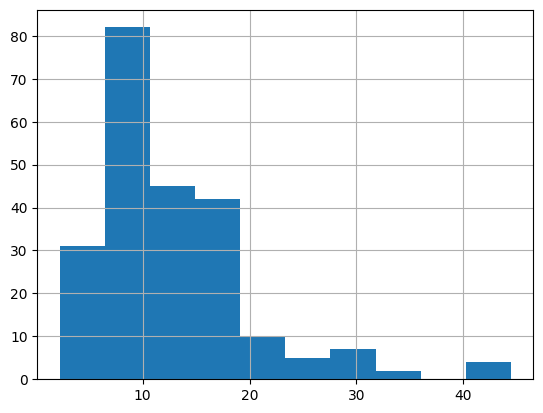

In [14]:
data['inflow'].hist()

In [15]:
predictanddata = data[BMFinds[:2]]
predictanddata

,BMF_R1,BMF_R2
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
223,1.0,0.0
224,1.0,0.0
225,1.0,0.0
226,0.0,0.0


In [16]:
annualpredictor.reset_index()['date'].dt.year.values

array([1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 1896, 1897, 1898, 1899, 1900, 1901, 1902,
       1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913,
       1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 19

In [17]:
annualpredictor['year'] = annualpredictor.reset_index()['date'].dt.year.values


In [18]:
data = pd.concat([annualpredictor['inflow'], annualpredictor['ewater'],annualpredictor['year']],axis=1, join='inner')

In [19]:
data

,,inflow,ewater,year
date,ewateri,,,
1896-06-30,0,7881104.0,0.0,1896
1897-06-30,0,5613518.0,0.0,1897
1898-06-30,0,7688981.0,0.0,1898
1899-06-30,0,8066449.0,0.0,1899
1900-06-30,0,7435997.0,0.0,1900
...,...,...,...,...
2005-06-30,1,7253731.0,2750.0,2005
2006-06-30,1,8887863.0,2750.0,2006
2007-06-30,1,2910648.0,2750.0,2007


In [20]:
data

,,inflow,ewater,year
date,ewateri,,,
1896-06-30,0,7881104.0,0.0,1896
1897-06-30,0,5613518.0,0.0,1897
1898-06-30,0,7688981.0,0.0,1898
1899-06-30,0,8066449.0,0.0,1899
1900-06-30,0,7435997.0,0.0,1900
...,...,...,...,...
2005-06-30,1,7253731.0,2750.0,2005
2006-06-30,1,8887863.0,2750.0,2006
2007-06-30,1,2910648.0,2750.0,2007


In [21]:
data

,,inflow,ewater,year
date,ewateri,,,
1896-06-30,0,7881104.0,0.0,1896
1897-06-30,0,5613518.0,0.0,1897
1898-06-30,0,7688981.0,0.0,1898
1899-06-30,0,8066449.0,0.0,1899
1900-06-30,0,7435997.0,0.0,1900
...,...,...,...,...
2005-06-30,1,7253731.0,2750.0,2005
2006-06-30,1,8887863.0,2750.0,2006
2007-06-30,1,2910648.0,2750.0,2007


In [22]:
data = pd.concat([annualpredictor['inflow'], annualpredictor['ewater'], annualpredictor['year']],axis=1, join='inner')
data = pd.concat([data,outdf[BMFinds]],axis=1)
data['inflow'] = (data['inflow']/1000000)
data['ewater'] = (data['ewater']/1000)
data['year'] = data['year'] - data['year'].min()
data = data.reset_index()[data.columns[0:]]
data
npredictands = 5
ngroups = data['year'].unique().shape[0]
print(ngroups)
predictanddata = data[BMFinds[:npredictands]]
# plt.scatter(x=data['inflow'], y= data['BMF_R3'])

# data = data.sort_values(by = 'inflow')
# n = 1 #data.shape[0]

# plt.scatter(data['inflow'], data['BMF_R3'], label = col)

with pymc.Model(coords = {"drange":range(predictanddata.shape[0]),'predictands':BMFinds[:npredictands], 'predictors':range(1) }) as binomial_regression_model:
    colnames = data.columns
    npred = predictanddata.shape[1]
    ndata = data.shape[0]
    npredictors = 2
    print(npred, ndata)

    x = pymc.Data("x", np.expand_dims(data['inflow'], axis=1), dims = ("drange",'predictors') )
    x1 = pymc.Data('x1', np.expand_dims(data['ewater'], axis=1), dims = ("drange",'predictors') )

    n = 1
    print(npred)
    # priors
    dummydata = np.expand_dims(data['inflow'], axis=1)
    dummy_ones = pymc.Data('dummy_ones',np.ones_like(dummydata,dtype=float), dims = ("drange",'predictors') )
    #dummymean = np.zeros(npred)
    dummycv = np.identity(npred)
    #beta0_mu = pymc.Normal("beta0_mu", mu=0., sigma=10., dims = ('predictors', 'predictands'))
    beta0 = pymc.Normal("beta0", mu=0, sigma=1000., dims = ('predictors', 'predictands'))
    beta1 = pymc.Normal("beta1", mu=0., sigma=1000.0, dims = ('predictors', 'predictands'))
    beta2 = pymc.Normal("beta2", mu=0., sigma=1000.0, dims = ('predictors', 'predictands'))

    # Latent factor for correlation (optional)
    #latentgroup = pymc.Normal("latent", mu=0, sigma=0.25, shape = (ngroups, 1)) #("drange",'predictors'))  # Shared latent effect
    #latent_weights = pymc.Normal("latent_weights", mu=0.0, sigma=0.1, dims = ('predictors', 'predictands'))
   # latent_weights = pymc.Data('latent_weights',np.zeros((1, npredictands) ,dtype=float)) #, dims = ('predictors', 'predictands') )
    #latent_scale = pymc.HalfNormal('latent_scale', sigma =0.50, shape = ())
    #latent_weights = pm.Normal("latent_weights", mu=0, sigma=1, shape=(g, k))

    # Assign weights based on group
   # latent = latentgroup[data['year']]

    #error_std_dist = pymc.HalfCauchy.dist(beta = 0.01, size = npred)
    #covmatrix = pt.diag(error_std_dist).eval()
    #error_chol, corr_, stds_ = pymc.LKJCholeskyCov("error_chol",eta = 1.0, n = npred, sd_dist = error_std_dist, compute_corr= True)
    #error_var = pymc.i ###+ pymc.math.dot( latent, latent_weights) + latent_scale*pymc.math.dot( latent, latent_weights) 
    mu_hat = pymc.Deterministic("mu_hat", pymc.math.dot(dummy_ones,beta0) + pymc.math.dot( x, beta1) + pymc.math.dot( x1, beta2) ,dims = ("drange",'predictands'))
    # linear model pymc.math.dot(dummy_ones,beta0) ) # +
   # print(mu_hat.shape)
    #mudist = pymc.MvNormal('mu_dist', mu = mu_hat, chol = error_chol, dims = ("drange",'predictands') )

    #mudist = pymc.MvNormal('mu_dist', mu = mu_hat, cov = covmatrix, dims = ("drange",'predictands') )
    p = pymc.Deterministic("p", pymc.math.invlogit(mu_hat),dims = ("drange",'predictands'))
    #print(mu, p)

    # likelihood
    y = pymc.Bernoulli("y", p=p, observed=predictanddata, dims = ("drange",'predictands') )

114
5 228
5


In [23]:
predictanddata

,BMF_R1,BMF_R2,BMF_R3,BMF_R4,BMF_R5
0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
223,1.0,0.0,0.0,0.0,0.0
224,1.0,0.0,0.0,0.0,0.0
225,1.0,0.0,0.0,0.0,0.0
226,0.0,0.0,0.0,0.0,0.0


In [24]:
with binomial_regression_model:
    idata = pymc.sample(2000, tune=2000, chains=4) #, nuts_sampler= optimizer='None', ) # exception_verbosity='high')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, beta2]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 85 seconds.
There were 4000 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


c:\src\github_dr\WERP_projecting_SFIs\.venv\lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
c:\src\github_dr\WERP_projecting_SFIs\.venv\lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
c:\src\github_dr\WERP_projecting_SFIs\.venv\lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>]], dtype=object)

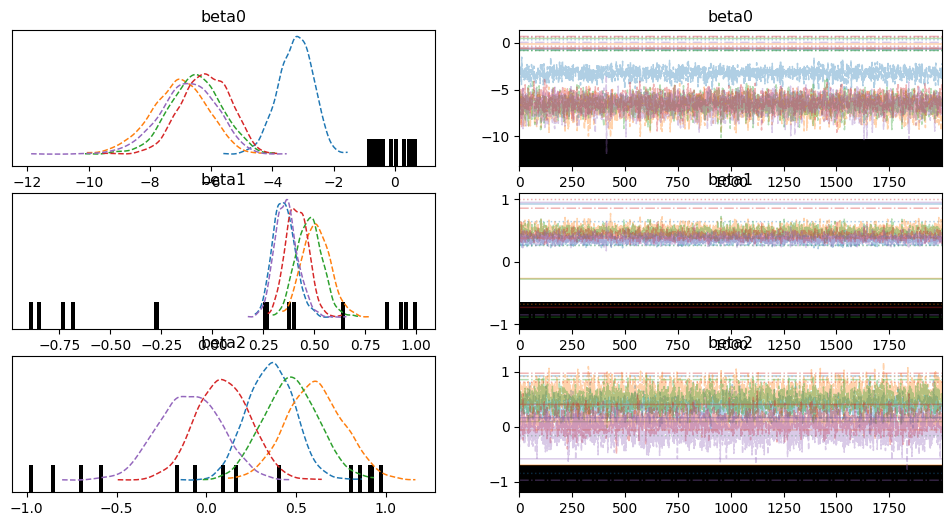

In [78]:
az.plot_trace(idata, var_names=[ "beta0", "beta1", "beta2"])

c:\src\github_dr\WERP_projecting_SFIs\.venv\lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'latent'}>,
        <Axes: title={'center': 'latent'}>]], dtype=object)

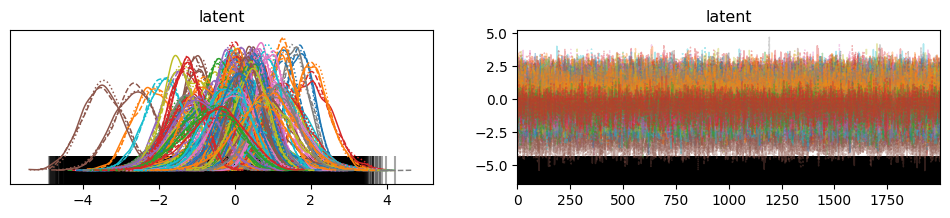

In [25]:
az.plot_trace(idata, var_names=["latent"])

In [41]:
p_true = (data["BMF_R3"])

In [57]:
post_mean

<xarray.DataArray 'p' (drange: 228, predictands: 5)> Size: 9kB
array([[0.69585178, 0.3623016 , 0.5642759 , 0.37457103, 0.23469466],
       [0.1855423 , 0.19515445, 0.25493142, 0.20352063, 0.19682376],
       [0.46696278, 0.20475115, 0.29590273, 0.16591135, 0.19800823],
       ...,
       [0.33646064, 0.08841254, 0.17715794, 0.00689375, 0.02660693],
       [0.16489436, 0.09811855, 0.23902799, 0.00755961, 0.03788337],
       [0.14177604, 0.14012547, 0.23091954, 0.03233266, 0.04729109]])
Coordinates:
  * predictands  (predictands) <U6 120B 'BMF_R1' 'BMF_R2' ... 'BMF_R4' 'BMF_R5'
  * drange       (drange) int32 912B 0 1 2 3 4 5 6 ... 222 223 224 225 226 227

In [51]:
type(post_mean.loc[{'predictands':predictand}].to_pandas())

pandas.core.series.Series

In [ ]:
medianplot  = pd.concat([data["inflow"], post_mean.loc[{'predictands':predictand}].to_dataframe()], axis = 1)

medianplot.sort_values(by = 'inflow')


,inflow,predictands,p
111,2.251601,BMF_R3,0.204201
225,2.910648,BMF_R3,0.177158
113,3.338731,BMF_R3,0.243597
49,3.572318,BMF_R3,0.246597
227,3.659820,BMF_R3,0.230920
...,...,...,...
136,35.431329,BMF_R3,0.999998
61,42.602896,BMF_R3,1.000000
175,43.749451,BMF_R3,1.000000
60,43.892791,BMF_R3,1.000000


In [58]:
data

,inflow,ewater,year,BMF_R1,BMF_R2,BMF_R3,BMF_R4,BMF_R5,BMF_R6,BMF_R7
0,7.881104,0.00,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,5.613518,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.688981,0.00,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.066449,0.00,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.435997,0.00,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
223,7.253731,2.75,109,1.0,0.0,0.0,0.0,0.0,0.0,0.0
224,8.887863,2.75,110,1.0,0.0,0.0,0.0,0.0,0.0,0.0
225,2.910648,2.75,111,1.0,0.0,0.0,0.0,0.0,0.0,0.0
226,4.761189,2.75,112,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
iii = np.where(data['ewater'].values == 0.0)[0]
iii

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113], dtype=int64)

In [69]:
idata.posterior.p.loc[{'predictands':predictand}].isel({"drange":iii})

<xarray.DataArray 'p' (chain: 4, draw: 2000, drange: 114)> Size: 7MB
array([[[3.21990228e-01, 4.89793514e-04, 2.79802157e-02, ...,
         2.25045680e-06, 3.22374874e-06, 1.43084846e-05],
        [2.92009641e-01, 5.59283992e-04, 2.24501039e-02, ...,
         2.03672658e-06, 3.02376972e-06, 1.57554937e-05],
        [2.81558539e-01, 2.64222104e-03, 1.25466553e-02, ...,
         1.63351176e-06, 3.87499085e-06, 2.98348878e-05],
        ...,
        [5.70730885e-01, 5.96271188e-03, 8.85756023e-03, ...,
         2.03202124e-04, 3.34644262e-06, 1.11061071e-05],
        [5.96704575e-01, 7.73245152e-03, 1.40752030e-02, ...,
         4.35749881e-04, 5.18102477e-06, 2.03084267e-05],
        [4.52486273e-01, 1.32758687e-03, 9.19727446e-02, ...,
         1.24417362e-02, 1.56436042e-03, 1.44734080e-03]],

       [[5.86906639e-01, 6.09970663e-05, 2.02115184e-01, ...,
         5.70297436e-04, 9.99942426e-06, 6.16269483e-04],
        [2.48273161e-01, 4.89792096e-02, 5.88484706e-03, ...,
         2.03567873e-03, 2.20810857e-05, 1.12216687e-07],
        [4.75781269e-01, 1.96880302e-04, 4.51602665e-02, ...,
         1.91391538e-04, 3.52818930e-05, 1.08421499e-02],
...
        [3.81153621e-01, 1.56912316e-03, 8.60872202e-03, ...,
         3.57616361e-05, 2.80000040e-04, 2.96085360e-04],
        [2.78095922e-01, 3.16164909e-04, 8.97964453e-03, ...,
         5.55891560e-04, 3.56011517e-05, 4.52708530e-05],
        [4.98919626e-01, 1.24255503e-03, 4.07079675e-02, ...,
         1.69066508e-03, 2.85813404e-06, 1.40804449e-03]],

       [[9.99658598e-01, 9.98493968e-01, 9.99644071e-01, ...,
         8.07288543e-01, 9.73800925e-01, 9.71821586e-01],
        [9.99658598e-01, 9.98493968e-01, 9.99644071e-01, ...,
         8.07288543e-01, 9.73800925e-01, 9.71821586e-01],
        [9.99658598e-01, 9.98493968e-01, 9.99644071e-01, ...,
         8.07288543e-01, 9.73800925e-01, 9.71821586e-01],
        ...,
        [9.99658598e-01, 9.98493968e-01, 9.99644071e-01, ...,
         8.07288543e-01, 9.73800925e-01, 9.71821586e-01],
        [9.99658598e-01, 9.98493968e-01, 9.99644071e-01, ...,
         8.07288543e-01, 9.73800925e-01, 9.71821586e-01],
        [9.99658598e-01, 9.98493968e-01, 9.99644071e-01, ...,
         8.07288543e-01, 9.73800925e-01, 9.71821586e-01]]])
Coordinates:
  * chain        (chain) int32 16B 0 1 2 3
  * draw         (draw) int32 8kB 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999
    predictands  <U6 24B 'BMF_R3'
  * drange       (drange) int32 456B 0 1 2 3 4 5 6 ... 108 109 110 111 112 113

In [80]:
data["inflow"][iii].sort_index() #.astype(int)

0      7.881104
1      5.613518
2      7.688981
3      8.066449
4      7.435997
         ...   
109    6.784499
110    8.171913
111    2.251601
112    4.214244
113    3.338731
Name: inflow, Length: 114, dtype: float64

In [78]:
data["inflow"][iii][(data["inflow"][iii].rank(method = 'first').astype(int)-1)]

34     5.683500
10    12.148183
30    11.402674
37    10.682743
26    18.160852
        ...    
20    10.891086
39    16.111475
0      7.881104
6      7.182613
1      5.613518
Name: inflow, Length: 114, dtype: float64

[[<matplotlib.axis.YTick at 0x260aaffcfd0>,

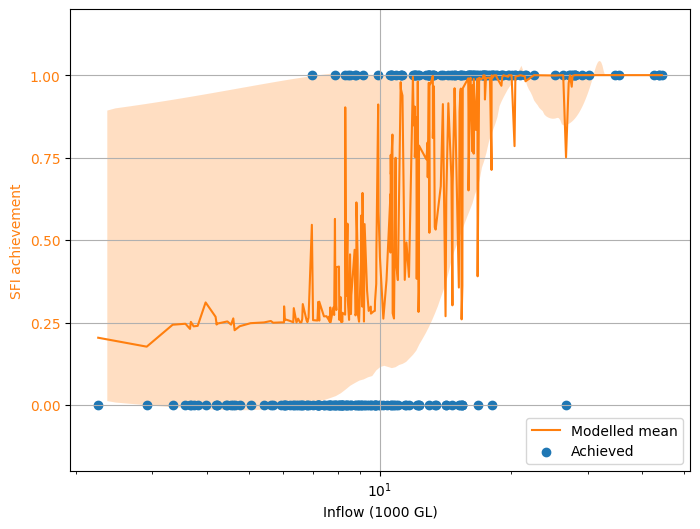

In [ ]:

predictand = 'BMF_R3'
fig, ax = plt.subplots(1, 1, figsize=(8,6)) #, gridspec_kw={"width_ratios": [2, 1]})

# Data space plot ========================================================

iii = np.where(data['ewater'].values == 0.0)[0]


az.plot_hdi(
    data["inflow"][iii],
    idata.posterior.p.loc[{'predictands':predictand}].isel({"drange":iii}),
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax,
    color="C1",
)
# posterior mean
post_mean = idata.posterior.p.mean(("chain", "draw"))
medianplot  = pd.concat([data["inflow"], post_mean.loc[{'predictands':predictand}].to_dataframe()], axis = 1)

medianplot.sort_values(by = 'inflow', inplace=True)

ax.plot(medianplot["inflow"], medianplot['p'], label="Modelled mean", color="C1")
# plot truth
ax.scatter(data["inflow"], p_true,  label="Achieved")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.set_ylabel("SFI achievement", color="C1")
ax.tick_params(axis="y", labelcolor="C1")
ax.legend(loc="lower right")
ax.set_xscale('log')
# instantiate a second axes that shares the same x-axis
#freq = ax.twinx()
# freq.set_ylabel("number of successes")
# freq.scatter(data["inflow"], data["BMF_R3"], color="k", label="data")
# get y-axes to line up
y_buffer = 0.2
#freq.set(ylim=[-y_buffer, n + y_buffer])
ax.set(ylim=[-(y_buffer / n), 1 + (y_buffer / n)])
ax.grid()
# freq.grid(None)
# # set both y-axis to have 5 ticks
ax.set(yticks=np.linspace(0, n, 5) / n)
# freq.set(yticks=np.linspace(0, n, 5))

# # Parameter space plot ===================================================
# az.plot_kde(
#     az.extract(idata, var_names="beta0"),
#     az.extract(idata, var_names="beta1"),
#     contourf_kwargs={"cmap": "Blues"},
#     ax=ax[1],
# )
# #ax[1].plot(beta0_true, beta1_true, "C2o", label="true")
# ax[1].set(xlabel=r"$\beta_0$", ylabel=r"$\beta_1$", title="Parameter space")
# ax[1].legend(facecolor="white", frameon=True);

In [54]:
predictdata1 = data.copy(deep=True)
predictdata2 = data.copy(deep = True)
predictdata1 = predictdata1[0:100]
predictdata2 = predictdata2[0:100]
predictdata1['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(100.) for a in range(100)] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))
predictdata2['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(100.) for a in range(100)] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

In [58]:
predictdata1

,inflow,ewater
0,2.251601,0.0
1,2.319771,0.0
2,2.390006,0.0
3,2.462366,0.0
4,2.536918,0.0
...,...,...
95,38.291101,0.0
96,39.450418,0.0
97,40.644835,0.0
98,41.875414,0.0


In [57]:
predictdata1.drop(columns=BMFinds,inplace=True)
predictdata1['ewater'] = 0.0
predictdata2['ewater'] = 2750.0/1000.0

In [66]:
predictdata1.shape[0]

100

In [68]:
binomial_regression_model

         beta0 ~ Normal(-10, 10)
         beta1 ~ Normal(0, 10)
         beta2 ~ Normal(0, 10)
        latent ~ Normal(0, 1)
latent_weights ~ Normal(0, 1)
        mu_hat ~ Deterministic(f(latent_weights, latent, beta2, beta1, beta0))
             p ~ Deterministic(f(latent_weights, latent, beta2, beta1, beta0))
             y ~ Bernoulli(p)

In [67]:
with binomial_regression_model:
    #updatex = pymc.Data("updatex", np.expand_dims(predictdata1['inflow'], axis=1), dims = ("drange",'predictors') )
    #updatex1 = pymc.Data('updatex1', np.expand_dims(predictdata1['ewater'], axis=1), dims = ("drange",'predictors') )
    
    pymc.set_data({'x':np.expand_dims(predictdata1['inflow'], axis=1) ,'x1': np.expand_dims(predictdata1['ewater'], axis=1)}, coords={"drange":range(predictdata1.shape[0] )  })
    idata1 = pymc.sample_posterior_predictive(idata,  var_names="p")

    #pymc.set_data({'x':np.expand_dims(predictdata2['inflow'], axis=1) ,'x1': np.expand_dims(predictdata2['ewater'], axis=1)})
    #idata2 = pymc.sample_posterior_predictive(idata, var_names="p")

Sampling: [latent]


Output()

ValueError: could not broadcast input array from shape (100,1) into shape (228,1)
Apply node that caused the error: Gemm{inplace}(Dot22.0, 1.0, x, beta1, 1.0)
Toposort index: 7
Inputs types: [TensorType(float64, shape=(None, None)), TensorType(float64, shape=()), TensorType(float64, shape=(None, None)), TensorType(float64, shape=(None, None)), TensorType(float64, shape=())]
Inputs shapes: [(228, 5), (), (100, 1), (1, 5), ()]
Inputs strides: [(40, 8), (), (8, 8), (40, 8), ()]
Inputs values: ['not shown', array(1.), 'not shown', array([[0.53933253, 0.59738247, 0.65980562, 0.8503491 , 0.59143389]]), array(1.)]
Outputs clients: [[Composite{sigmoid((i0 + i1))}(Gemm{inplace}.0, Gemm{inplace}.0)]]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

In [ ]:
with binomial_regression_model:
    pymc.set_data({'x':predictdata2['inflow'] })
    idata = pymc.sample_posterior_predictive(idata,  var_names=["p"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True,)

In [ ]:
outquants1 = idata1.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
outquants2 = idata2.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,6)) #, gridspec_kw={"width_ratios": [2, 1]})


ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.025}].data ,y2 = outquants1.loc[{'quantile':0.975}].data, color = "C1", alpha = 0.3)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.025}].data ,y2 = outquants2.loc[{'quantile':0.975}].data, color = "C2", alpha = 0.3)
ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.25}].data ,y2 = outquants1.loc[{'quantile':0.75}].data, color = "C1", alpha = 0.6)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.25}].data ,y2 = outquants2.loc[{'quantile':0.75}].data, color = "C2", alpha = 0.6)

# posterior mean
post_mean1 = idata1.posterior_predictive.p.mean(("chain", "draw"))
post_mean2 = idata2.posterior_predictive.p.mean(("chain", "draw"))
#ax.plot(predictdata1["inflow"], post_mean1, label="posterior mean", color="C1", linestyle = "--")
#ax.plot(predictdata2["inflow"], post_mean2, label="posterior mean", color="C2", linestyle = "--")

ax.plot(predictdata1["inflow"], outquants1.loc[{'quantile':0.5}].data, label="Low ewater", color="C1")
ax.plot(predictdata2["inflow"], outquants2.loc[{'quantile':0.5}].data, label="High ewater", color="C2")

# plot truth
#ax.scatter(data["inflow"], p_true,  label="true", color="C2")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.set_xscale('log')
ax.set_ylabel("SFI achievement probability", color="black")
ax.tick_params(axis="y", labelcolor="black")
ax.legend()

In [ ]:
sset = np.array([int(random.random()*outdf0.shape[0]) for a in range(11)])
sset

In [ ]:
predictdata1 = data.loc[sset]
predictdata1['ewater']=0.0
predictdata2 = predictdata1.copy(deep=True)
predictdata2['ewater']=2750.0/1000

In [ ]:

with binomial_regression_model:
    pymc.set_data({'x':predictdata1['inflow'] ,'x1':predictdata1['ewater'] })
    idata1 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata2['inflow'],'x1':predictdata2['ewater']})
    idata2 = pymc.sample_posterior_predictive(idata, var_names="p")

outquants1 = idata1.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
outquants2 = idata2.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )

In [ ]:
pltx = [a for a in range(predictdata1.shape[0])]
plt.scatter(x=pltx, y = predictdata1['BMF_R3'].values , c='black')
plt.vlines(x=pltx, ymin = outquants1.loc[{'quantile':0.025}].data ,ymax = outquants1.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
plt.vlines(x=pltx, ymin = outquants1.loc[{'quantile':0.25}].data ,ymax = outquants1.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.5)
plt.scatter(x=pltx, y = outquants1.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
plt.scatter(x=pltx, y = outquants1.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

plt.vlines(x=pltx, ymin = outquants2.loc[{'quantile':0.025}].data ,ymax = outquants2.loc[{'quantile':0.975}].data, color='green' , linewidths = 2, alpha = 0.3)
plt.vlines(x=pltx, ymin = outquants2.loc[{'quantile':0.25}].data ,ymax = outquants2.loc[{'quantile':0.75}].data, color='green' , linewidths = 6, alpha = 0.5)
plt.scatter(x=pltx, y = outquants2.loc[{'quantile':0.5}].data,marker=0, c = 'green')
plt.scatter(x=pltx, y = outquants2.loc[{'quantile':0.5}].data,marker=1, c = 'green')

plt.grid()
plt.ylabel("SFI success probability")
plt.xlabel("Year")



In [ ]:
out1summary = idata1.posterior_predictive.p.sum(dim = ("p_dim_2")).quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
out1summary = (out1summary/predictdata1.shape[0])
outres1 = predictdata1['BMF_R3'].sum()/predictdata1.shape[0]
print(out1summary, outres1)

out2summary = idata2.posterior_predictive.p.sum(dim = ("p_dim_2")).quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
out2summary = (out2summary/predictdata2.shape[0])
outres2 = predictdata2['BMF_R3'].sum()/predictdata2.shape[0]
print(out1summary, outres1)

In [ ]:
plt.vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.025}].data ,ymax = out1summary.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
plt.vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.25}].data ,ymax = out1summary.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.6)
plt.scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
plt.scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

plt.vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.025}].data ,ymax = out2summary.loc[{'quantile':0.975}].data ,color = 'green', linewidths = 2, alpha = 0.3)
plt.vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.25}].data ,ymax = out2summary.loc[{'quantile':0.75}].data ,color = 'green', linewidths = 6, alpha = 0.6)
plt.scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=0, c = 'green')
plt.scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=1, c = 'green')
plt.scatter(x="All_years", y = outres1, c = 'red', s = 20)
plt.ylim((0,1))


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,6), width_ratios=[8,1])

pltx = np.array([a for a in range(predictdata1.shape[0])])
ax[0].scatter(x=pltx, y = predictdata1['BMF_R3'].values , c='black')
ax[0].vlines(x=pltx-0.1, ymin = outquants1.loc[{'quantile':0.025}].data ,ymax = outquants1.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
ax[0].vlines(x=pltx-0.1, ymin = outquants1.loc[{'quantile':0.25}].data ,ymax = outquants1.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.5)
ax[0].scatter(x=pltx-0.1, y = outquants1.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
ax[0].scatter(x=pltx-0.1, y = outquants1.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

ax[0].vlines(x=pltx+0.1, ymin = outquants2.loc[{'quantile':0.025}].data ,ymax = outquants2.loc[{'quantile':0.975}].data, color='green' , linewidths = 2, alpha = 0.3)
ax[0].vlines(x=pltx+0.1, ymin = outquants2.loc[{'quantile':0.25}].data ,ymax = outquants2.loc[{'quantile':0.75}].data, color='green' , linewidths = 6, alpha = 0.5)
ax[0].scatter(x=pltx+0.1, y = outquants2.loc[{'quantile':0.5}].data,marker=0, c = 'green')
ax[0].scatter(x=pltx+0.1, y = outquants2.loc[{'quantile':0.5}].data,marker=1, c = 'green')

ax[0].grid()
ax[0].set_ylabel("SFI success probability")
ax[0].set_xlabel("Year")
ax[0].set_ylim((-0.05,1.05))

ax[1].scatter(x="All_years", y = outres1, c = 'black')
ax[1].vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.025}].data ,ymax = out1summary.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
ax[1].vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.25}].data ,ymax = out1summary.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.6)
ax[1].scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
ax[1].scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

ax[1].vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.025}].data ,ymax = out2summary.loc[{'quantile':0.975}].data ,color = 'green', linewidths = 2, alpha = 0.3)
ax[1].vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.25}].data ,ymax = out2summary.loc[{'quantile':0.75}].data ,color = 'green', linewidths = 6, alpha = 0.6)
ax[1].scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=0, c = 'green')
ax[1].scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=1, c = 'green')

ax[1].set_ylim((-0.05,1.05))
ax[1].grid()

In [ ]:
np.array(idata1.posterior_predictive.p.sum(dim = ("p_dim_2")).data/predictdata1.shape[0]).flatten()

In [ ]:
plt.boxplot( (idata1.posterior_predictive.p.sum(dim = ("p_dim_2") ).data/predictdata1.shape[0]).flatten() , whis = 0.95, showfliers= False, showmeans=True)
plt.scatter(x=1, y = outres1)
plt.ylim((0,1))

In [ ]:
data

In [ ]:
laggedinflow_predictor.head()

In [ ]:
data['laggedinflow']

In [ ]:
data = pd.concat([annualpredictor['inflow'],annualpredictor['ewater'],laggedinflow_predictor['inflow_lagged'],outdf['BMF_R3']],axis=1)

data

In [ ]:

data = pd.concat([annualpredictor['inflow'],annualpredictor['ewater'],laggedinflow_predictor['inflow_lagged'],outdf['BMF_R3']],axis=1)

data.dropna(inplace=True)
data['inflow'] = (data['inflow']/1000000)
data['inflow_lagged'] = (data['inflow_lagged']/1000000)
data['ewater'] = data['ewater'] /1000
data = data.reset_index()[data.columns[-4:]]
print(data)
#plt.scatter(x=data['inflow'], y= data['BMF_R3'])

data = data.sort_values(by = 'inflow')
n = 1 #data.shape



plt.scatter(data['inflow'], data['BMF_R3'], label = col)

with pymc.Model() as binomial_regression_model:
    x = pymc.Data("x", (data['inflow']))
    x1 = pymc.Data("x1", (data['ewater']))
    z = pymc.Data("z", (data['inflow_lagged']))
    # priors
    beta0 = pymc.Normal("beta0", mu=0, sigma=100)
    beta1 = pymc.Normal("beta1", mu=0, sigma=100)
    beta2 = pymc.Normal("beta2", mu=0, sigma=100)
    beta3 = pymc.Normal("beta3", mu=0, sigma=100)
    # linear model
    mu = beta0 + beta1 * x + beta2 * z + beta3 * x1
    p = pymc.Deterministic("p", pymc.math.invlogit(mu))
    print(mu, p)
    # likelihood
    pymc.Binomial("y", n=n, p=p, observed=data['BMF_R3'])

In [ ]:
with binomial_regression_model:
    idata = pymc.sample(2000, tune=4000, chains=4)

In [ ]:
az.plot_trace(idata, var_names=["beta0", "beta1", "beta2",'beta3'])

In [ ]:
p_true = (data["BMF_R3"])
fig, ax = plt.subplots(1, 1, figsize=(8,6))

# Data space plot ========================================================
az.plot_hdi(
    data["inflow"],
    idata.posterior.p,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax,
    color="C1",
)
# posterior mean
post_mean = idata.posterior.p.mean(("chain", "draw"))
ax.plot(data["inflow"], post_mean, label="posterior mean", color="C1")
# plot truth
ax.scatter(data["inflow"], p_true,  label="true", color="C2")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.set_ylabel("proportion successes", color="C1")
ax.tick_params(axis="y", labelcolor="C1")
ax.legend()
#ax.set_xscale('log')
# instantiate a second axes that shares the same x-axis
# freq = ax.twinx()
# freq.set_ylabel("number of successes")
# freq.scatter(data["inflow"], data["BMF_R3"], color="k", label="data")
# get y-axes to line up
y_buffer = 0.2
# freq.set(ylim=[-y_buffer, n + y_buffer])
ax.set(ylim=[-(y_buffer / n), 1 + (y_buffer / n)])
ax.grid()
# set both y-axis to have 5 ticks
ax.set(yticks=np.linspace(0, n, 5) / n)
#freq.set(yticks=np.linspace(0, n, 5))


In [ ]:
outquants = idata.posterior.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )

In [ ]:
data['inflow_lagged'].quantile([0.01]).values[0]

In [ ]:
predictdata1 = data.copy(deep=True)
predictdata2 = data.copy(deep = True)
predictdata1['inflow_lagged'] = data['inflow_lagged'].quantile([0.01]).values[0]
predictdata2['inflow_lagged'] = data['inflow_lagged'].quantile([0.99]).values[0]
predictdata1['ewater'] = 0.0
predictdata2['ewater'] = 2750./1000
predictdata1['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

predictdata2['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

predictdata3 = data.copy(deep=True)
predictdata4 = data.copy(deep = True)
predictdata3['inflow_lagged'] = data['inflow_lagged'].quantile([0.01]).values[0]
predictdata4['inflow_lagged'] = data['inflow_lagged'].quantile([0.99]).values[0]
predictdata3['ewater'] = 2750./1000
predictdata4['ewater'] = 0.0 
predictdata3['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

predictdata4['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))


In [ ]:
with binomial_regression_model:
    pymc.set_data({'x':predictdata1['inflow'], 'z':predictdata1['inflow_lagged'], 'x1':predictdata1['ewater']})
    idata1 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata2['inflow'], 'z':predictdata2['inflow_lagged'], 'x1':predictdata2['ewater']})
    idata2 = pymc.sample_posterior_predictive(idata, var_names="p")

    pymc.set_data({'x':predictdata3['inflow'], 'z':predictdata3['inflow_lagged'], 'x1':predictdata3['ewater']})
    idata3 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata4['inflow'], 'z':predictdata4['inflow_lagged'], 'x1':predictdata4['ewater']})
    idata4 = pymc.sample_posterior_predictive(idata, var_names="p")
    

In [ ]:
outquants1 = idata1.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )
outquants2 = idata2.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )
outquants3= idata3.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )
outquants4 = idata4.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,6)) #, gridspec_kw={"width_ratios": [2, 1]})

ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.05}].data ,y2 = outquants1.loc[{'quantile':0.95}].data, color = "C1", alpha = 0.3)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.05}].data ,y2 = outquants2.loc[{'quantile':0.95}].data, color = "C2", alpha = 0.3)
ax.fill_between(x = (predictdata3['inflow']), y1 = outquants3.loc[{'quantile':0.05}].data ,y2 = outquants3.loc[{'quantile':0.95}].data, color = "C3", alpha = 0.3)
ax.fill_between(x = (predictdata4['inflow']), y1 = outquants4.loc[{'quantile':0.05}].data ,y2 = outquants4.loc[{'quantile':0.95}].data, color = "C4", alpha = 0.3)

ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.25}].data ,y2 = outquants1.loc[{'quantile':0.75}].data, color = "C1", alpha = 0.6)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.25}].data ,y2 = outquants2.loc[{'quantile':0.75}].data, color = "C2", alpha = 0.6)
ax.fill_between(x = (predictdata3['inflow']), y1 = outquants3.loc[{'quantile':0.25}].data ,y2 = outquants3.loc[{'quantile':0.75}].data, color = "C3", alpha = 0.6)
ax.fill_between(x = (predictdata4['inflow']), y1 = outquants4.loc[{'quantile':0.25}].data ,y2 = outquants4.loc[{'quantile':0.75}].data, color = "C4", alpha = 0.6)


# posterior mean
post_mean1 = idata1.posterior_predictive.p.mean(("chain", "draw"))
post_mean2 = idata2.posterior_predictive.p.mean(("chain", "draw"))
#ax.plot(predictdata1["inflow"], post_mean1, label="Mean - Low lag flow", color="C1", linestyle = "--")
#ax.plot(predictdata2["inflow"], post_mean2, label="Mean - High lag flow", color="C2", linestyle = "--")

ax.plot(predictdata1["inflow"], outquants1.loc[{'quantile':0.5}].data, label="Median - Low lag flow, low ewater", color="C1")
ax.plot(predictdata2["inflow"], outquants2.loc[{'quantile':0.5}].data, label="Median - High lag flow, high ewater", color="C2")
ax.plot(predictdata3["inflow"], outquants3.loc[{'quantile':0.5}].data, label="Median - Low lag flow, high ewater", color="C3")
ax.plot(predictdata4["inflow"], outquants4.loc[{'quantile':0.5}].data, label="Median - High lag flow, low ewater", color="C4")

# plot truth
#ax.scatter(data["inflow"], p_true,  label="true", color="C2")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.grid()
ax.set_ylabel("SFI achivement probability", color="black")
ax.tick_params(axis="y", labelcolor="black")
ax.legend()
ax.set_xscale('log')


In [ ]:
p_true = (data["BMF_R3"])
fig, ax = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={"width_ratios": [2, 1]})

# Data space plot ========================================================
az.plot_hdi(
    predictdata2["inflow"],
    idata2.posterior_predictive.p,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax[0],
    color="C1",
)
# posterior mean
post_mean = idata2.posterior_predictive.p.mean(("chain", "draw"))
ax[0].plot(predictdata2["inflow"], post_mean, label="posterior mean", color="C1")
# plot truth
ax[0].scatter(predictdata2["inflow"], p_true,  label="true", color="C2")
# formatting
ax[0].set(xlabel="Inflow (1000 GL)")
ax[0].set_ylabel("proportion successes", color="C1")
ax[0].tick_params(axis="y", labelcolor="C1")
ax[0].legend()
